# HIV Model

Richard Gao

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [36]:
# Set initial state
init = State(R = 200,
             L = 0,
             E = 0,
             V = 4e-7)

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [47]:
# Define System
system = System(R_birthrate = 1.36,                # Gamma
                R_activation_rate = 0.2,           # tau
                R_death_rate = 0.00136,            # mu
                R_infection_rate = 0.00027,        # Beta
                L_activation_rate = 0.036,         # alpha
                latent_infec_rate = 0.1,           # rho
                E_death_rate = 0.33,               # delta
                V_birth_rate = 100,                # pi
                V_death_rate = 2,                  # sigma
                init=init,
                t0=0,
                t_end=120,
                dt=.1)                  

,values
R_birthrate,1.36
R_activation_rate,0.2
R_death_rate,0.00136
R_infection_rate,0.00027
L_activation_rate,0.036
latent_infec_rate,0.1
E_death_rate,0.33
V_birth_rate,100
V_death_rate,2
init,R 2.000000e+02 L 0.000000e+00 E 0.000...


In [48]:
def plot_results(R, L, E, V):
    plot(R, '-r', label='Uninfected lymphocytes')
    plot(L, '-g', label='Latently infected cells')
    plot(E, '-b', label='Actively infected cells')
    plot(V, '-y', label='Free virions')
    decorate(xlabel='Time (days)',
             ylabel='Population')

In [49]:
def update_func(state, dt, system):
    unpack(system)
    r, l, e, v = state
    
    delta_R = (R_birthrate * R_activation_rate) - (R_death_rate * r) - (R_infection_rate * r * v)
    delta_L = (latent_infec_rate * R_infection_rate * r * v) - (R_death_rate * l) - (L_activation_rate * l)
    delta_E = ((1-latent_infec_rate) * R_infection_rate * v * r) + (L_activation_rate * l) - (E_death_rate * e)
    delta_V = (V_birth_rate * e) - (V_death_rate * v)
    
    r += delta_R * dt
    l += delta_L * dt
    e += delta_E * dt
    v += delta_V * dt
    
    return State(R=r, L=l, E=e, V=v)

run_simulation creates a TimeFrame to store the Timeseries that are defined in individual timesteps. The timesteps is necessary to explicity state because the dt is a non-integer value. Perfoming computations using small non-integer values often results in rounding issues. By creating a Series (timesteps) that hold the value of t in each index (specified by linspace), the values of t will not be inaccurate.

In [50]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    steps = linspace(t0, t_end, int(t_end / dt))
    timesteps = Series(steps)
    
#     print(timesteps.index)
    
    for t in timesteps.index[:-1]:
        frame.row[timesteps[t+1]] = update_func(frame.row[timesteps[t]], dt, system)
        
    return frame

In [51]:
results = run_simulation(system, update_func)
results

,R,L,E,V
0.000000,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
0.100083,200.000000,2.160000e-10,1.944000e-09,3.200000e-07
0.200167,200.000000,3.879930e-10,3.435826e-09,2.754400e-07
0.300250,200.000000,5.352811e-10,4.662479e-09,2.547103e-07
0.400334,200.000000,6.708248e-10,5.748436e-09,2.503930e-07
0.500417,200.000000,8.035308e-10,6.778062e-09,2.577987e-07
0.600500,200.000000,9.397402e-10,7.810181e-09,2.740196e-07
0.700584,200.000000,1.084200e-09,8.887563e-09,2.973175e-07
0.800667,200.000000,1.240701e-09,1.004314e-08,3.267296e-07
0.900751,200.000000,1.412500e-09,1.130409e-08,3.618151e-07


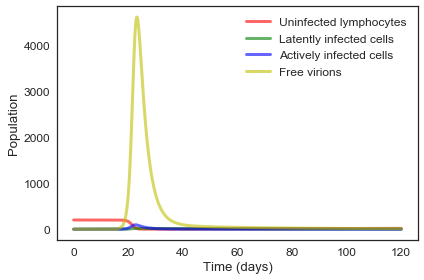

In [52]:
plot_results(results.R, results.L, results.E, results.V)

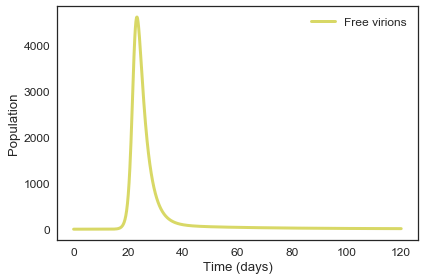

In [53]:
plot(results.V, '-y', label='Free virions')
decorate(xlabel='Time (days)',
         ylabel='Population')

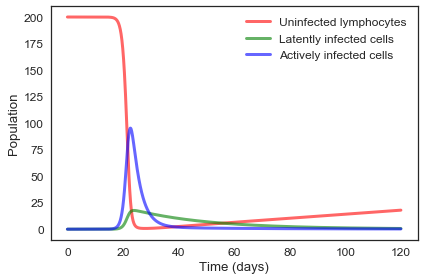

In [54]:
plot(results.R, '-r', label='Uninfected lymphocytes')
plot(results.L, '-g', label='Latently infected cells')
plot(results.E, '-b', label='Actively infected cells')
decorate(xlabel='Time (days)',
         ylabel='Population')